# **Lending Club Loans Data EDA**

Sections required in the report:

* A summary of the data, clearly showing the size of the dataset, its variables, and possible target variables.

* A well-structured data exploration plan that is logical, meaningful, and outlines the vision for analysis.

* A detailed discussion of Exploratory Data Analysis (EDA) results that are informative, actionable, and insightful.

* A clear explanation of data cleaning and feature engineering steps, including handling missing values, encoding, and visualizations. The report should also include the output of data cleaning, feature engineering steps, handling missing values, encoding, and visualizations. Relevant screenshots should be included. 

* A dedicated section summarizing key findings and insights, effectively synthesizing EDA results in a meaningful and actionable way.

* A section that presents at least three hypotheses relevant to the dataset. 

* A thorough discussion of a significance test for at least one strong hypothesis. The results or their presentation should be truly insightful and exceed expectations, even if there are slight misinterpretations or room for feedback.

* A concluding section that includes key takeaways and next steps.


In [ ]:
# import the lending club loans dataset, first by showing the path to the file
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wordsforthewise/lending-club")

print("Path to dataset files:", path)

Resuming download from 44040192 bytes (1312467718 bytes left)...
Resuming download from https://www.kaggle.com/api/v1/datasets/download/wordsforthewise/lending-club?dataset_version_number=3 (44040192/1356507910) bytes left.


100%|██████████| 1.26G/1.26G [01:38<00:00, 13.4MB/s]

Extracting files...


Path to dataset files: /Users/alecmitchell-thomson/.cache/kagglehub/datasets/wordsforthewise/lending-club/versions/3


In [13]:
import os
os.chdir("/Users/alecmitchell-thomson/Desktop/Coding/IBM-Machine-Learning-course")

In [584]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", None)         

In [227]:
# import the whole accepted loans dataset into a single dataframe
data_full = pd.read_csv("1-Exploratory-data-analysis/Final-Project/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")

/var/folders/7m/_v42_c3x3pxc0myzbkfdk97h0000gn/T/ipykernel_6718/3724813155.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv("1-Exploratory-data-analysis/Final-Project/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv")


In [ ]:
# take a smaller random sample of the full dataset to reduce compute time for EDA
data_full = data_full.dropna(subset="title").dropna(subset=["fico_range_low", "fico_range_high"])
data_sample= data_full.sample(frac=0.01).reset_index()


In [230]:
# show messy, long sample statset
data_sample

,index,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,377039,40664224,NaN,18000.0,18000.0,18000.00,36 months,6.68,553.16,A,A3,Machinic,10+ years,RENT,75000.0,Not Verified,Feb-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,019xx,MA,19.68,0.0,Aug-1996,750.0,754.0,0.0,61.0,NaN,11.0,0.0,23663.0,40.9,18.0,f,0.00,0.00,19903.937535,19903.94,18000.00,1903.94,0.0,0.0,0.0,Jan-2018,1103.18,NaN,Mar-2019,829.0,825.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,188189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57900.0,NaN,NaN,NaN,4.0,17108.0,33037.0,41.7,0.0,0.0,32.0,222.0,6.0,6.0,1.0,6.0,NaN,18.0,61.0,0.0,6.0,6.0,7.0,9.0,4.0,8.0,13.0,6.0,11.0,0.0,0.0,0.0,2.0,94.4,0.0,0.0,0.0,252399.0,49534.0,56700.0,37397.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1187259,28702683,NaN,5000.0,5000.0,5000.00,36 months,13.35,169.32,C,C2,chef,10+ years,RENT,65000.0,Verified,Oct-2014,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,107xx,NY,23.63,0.0,Dec-2000,705.0,709.0,0.0,NaN,NaN,10.0,0.0,19575.0,99.4,12.0,f,0.00,0.00,6124.400564,6124.40,5000.00,1124.40,0.0,0.0,0.0,Nov-2017,7.58,NaN,Mar-2019,604.0,600.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,29772.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19700.0,NaN,NaN,NaN,5.0,2977.0,387.0,96.7,0.0,0.0,31.0,165.0,14.0,14.0,0.0,14.0,NaN,18.0,NaN,0.0,5.0,8.0,5.0,6.0,3.0,8.0,9.0,8.0,10.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,40307.0,29772.0,11800.0,20607.0,NaN,NaN,NaN,NaN

In [534]:
# Select columns to analyse in accepted dataframe
columns = ["loan_status", "loan_amnt", "int_rate", "installment", "annual_inc", "dti", "sub_grade", "term", "purpose", "emp_length", "home_ownership", "verification_status"]
data = data_sample[columns]
data

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,Fully Paid,18000.0,6.68,553.16,75000.0,19.68,A3,36 months,debt_consolidation,10+ years,RENT,Not Verified
1,Fully Paid,5000.0,13.35,169.32,65000.0,23.63,C2,36 months,debt_consolidation,10+ years,RENT,Verified
2,Fully Paid,35000.0,16.29,856.54,176000.0,15.37,D2,60 months,credit_card,8 years,MORTGAGE,Verified
3,Fully Paid,2000.0,12.62,67.03,38000.0,6.93,C1,36 months,debt_consolidation,< 1 year,RENT,Source Verified
4,Fully Paid,8000.0,13.98,273.35,52000.0,18.04,C3,36 months,debt_consolidation,6 years,RENT,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...
22368,Fully Paid,7200.0,10.75,234.87,60000.0,29.48,B4,36 months,debt_consolidation,NaN,RENT,Verified
22369,Current,22000.0,6.08,670.09,84000.0,18.90,A2,36 months,credit_card,5 years,OWN,Source Verified
22370,Fully Paid,25000.0,15.33,870.71,79000.0,13.96,D3,36 months,debt_consolidation,10+ years,RENT,Not Verified
22371,Fully Paid,15550.0,17.86,561.08,56000.0,38.74,D5,36 months,home_improvement,9 years,MORTGAGE,Not Verified


## **Datacleaning**

In [535]:
# change debt-to-income ratio in df_r to floats, and divide by 100 for percentages
data= data.copy()
data["dti"] = data["dti"].apply(lambda x:x/100)
data["dti"].describe()

count    22353.000000
mean         0.187592
std          0.120860
min          0.000000
25%          0.119000
50%          0.179100
75%          0.244800
max          9.990000
Name: dti, dtype: float64

In [536]:
# change employment length to an integer number of years for both dataframes
def clean_emp_length(x):
    if pd.isna(x) or x == 'n/a':
        return 0             # or np.nan
    if '<' in x:
        return 0                  # treat '< 1 year' as 0 years
    if '10+' in x:
        return 10                 # treat '10+ years' as 10
    return int(x.strip().split()[0])  # grab the number at start

data = data.copy()
data['emp_length'] = data['emp_length'].apply(clean_emp_length)
data


,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,Fully Paid,18000.0,6.68,553.16,75000.0,0.1968,A3,36 months,debt_consolidation,10,RENT,Not Verified
1,Fully Paid,5000.0,13.35,169.32,65000.0,0.2363,C2,36 months,debt_consolidation,10,RENT,Verified
2,Fully Paid,35000.0,16.29,856.54,176000.0,0.1537,D2,60 months,credit_card,8,MORTGAGE,Verified
3,Fully Paid,2000.0,12.62,67.03,38000.0,0.0693,C1,36 months,debt_consolidation,0,RENT,Source Verified
4,Fully Paid,8000.0,13.98,273.35,52000.0,0.1804,C3,36 months,debt_consolidation,6,RENT,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...
22368,Fully Paid,7200.0,10.75,234.87,60000.0,0.2948,B4,36 months,debt_consolidation,0,RENT,Verified
22369,Current,22000.0,6.08,670.09,84000.0,0.1890,A2,36 months,credit_card,5,OWN,Source Verified
22370,Fully Paid,25000.0,15.33,870.71,79000.0,0.1396,D3,36 months,debt_consolidation,10,RENT,Not Verified
22371,Fully Paid,15550.0,17.86,561.08,56000.0,0.3874,D5,36 months,home_improvement,9,MORTGAGE,Not Verified


In [537]:
# clean the term length to just the numerical values
def clean_term(x):
    if pd.isna(x) or x == 'n/a':
        return None
    
    return int(x.strip()[:2])

data = data.copy()
data['term'] = data['term'].apply(clean_term)
data

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,Fully Paid,18000.0,6.68,553.16,75000.0,0.1968,A3,36,debt_consolidation,10,RENT,Not Verified
1,Fully Paid,5000.0,13.35,169.32,65000.0,0.2363,C2,36,debt_consolidation,10,RENT,Verified
2,Fully Paid,35000.0,16.29,856.54,176000.0,0.1537,D2,60,credit_card,8,MORTGAGE,Verified
3,Fully Paid,2000.0,12.62,67.03,38000.0,0.0693,C1,36,debt_consolidation,0,RENT,Source Verified
4,Fully Paid,8000.0,13.98,273.35,52000.0,0.1804,C3,36,debt_consolidation,6,RENT,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...
22368,Fully Paid,7200.0,10.75,234.87,60000.0,0.2948,B4,36,debt_consolidation,0,RENT,Verified
22369,Current,22000.0,6.08,670.09,84000.0,0.1890,A2,36,credit_card,5,OWN,Source Verified
22370,Fully Paid,25000.0,15.33,870.71,79000.0,0.1396,D3,36,debt_consolidation,10,RENT,Not Verified
22371,Fully Paid,15550.0,17.86,561.08,56000.0,0.3874,D5,36,home_improvement,9,MORTGAGE,Not Verified


In [538]:
# clean the risk grade from letter grades to numerical scale
grade_list = sorted(list(data["sub_grade"].unique()))
rankings = list(range(len(grade_list)))
grade_key = dict(zip(grade_list, rankings))
grade_key

def clean_grade(x):
    if pd.isna(x) or x == 'n/a':
        return None
    
    return grade_key[x]

data = data.copy()
data["sub_grade"] = data["sub_grade"].apply(clean_grade)
data


,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,Fully Paid,18000.0,6.68,553.16,75000.0,0.1968,2,36,debt_consolidation,10,RENT,Not Verified
1,Fully Paid,5000.0,13.35,169.32,65000.0,0.2363,11,36,debt_consolidation,10,RENT,Verified
2,Fully Paid,35000.0,16.29,856.54,176000.0,0.1537,16,60,credit_card,8,MORTGAGE,Verified
3,Fully Paid,2000.0,12.62,67.03,38000.0,0.0693,10,36,debt_consolidation,0,RENT,Source Verified
4,Fully Paid,8000.0,13.98,273.35,52000.0,0.1804,12,36,debt_consolidation,6,RENT,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...
22368,Fully Paid,7200.0,10.75,234.87,60000.0,0.2948,8,36,debt_consolidation,0,RENT,Verified
22369,Current,22000.0,6.08,670.09,84000.0,0.1890,1,36,credit_card,5,OWN,Source Verified
22370,Fully Paid,25000.0,15.33,870.71,79000.0,0.1396,17,36,debt_consolidation,10,RENT,Not Verified
22371,Fully Paid,15550.0,17.86,561.08,56000.0,0.3874,19,36,home_improvement,9,MORTGAGE,Not Verified


In [539]:
# clean the verification status column so that it is just 1s and 0s
veri_status_list = list(data["verification_status"].unique())
categories = [0, 1, 1]
veri_status_key = dict(zip(veri_status_list, categories))

def clean_veri_status(x):
    if pd.isna(x) or x == 'n/a':
        return None
    
    return veri_status_key[x]

data = data.copy()
data["verification_status"] = data["verification_status"].apply(clean_veri_status)
data

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,Fully Paid,18000.0,6.68,553.16,75000.0,0.1968,2,36,debt_consolidation,10,RENT,0
1,Fully Paid,5000.0,13.35,169.32,65000.0,0.2363,11,36,debt_consolidation,10,RENT,1
2,Fully Paid,35000.0,16.29,856.54,176000.0,0.1537,16,60,credit_card,8,MORTGAGE,1
3,Fully Paid,2000.0,12.62,67.03,38000.0,0.0693,10,36,debt_consolidation,0,RENT,1
4,Fully Paid,8000.0,13.98,273.35,52000.0,0.1804,12,36,debt_consolidation,6,RENT,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22368,Fully Paid,7200.0,10.75,234.87,60000.0,0.2948,8,36,debt_consolidation,0,RENT,1
22369,Current,22000.0,6.08,670.09,84000.0,0.1890,1,36,credit_card,5,OWN,1
22370,Fully Paid,25000.0,15.33,870.71,79000.0,0.1396,17,36,debt_consolidation,10,RENT,0
22371,Fully Paid,15550.0,17.86,561.08,56000.0,0.3874,19,36,home_improvement,9,MORTGAGE,0


In [540]:
# clean up the loan_status column, giving paid loans a value of 1, and unpaid/charged off loans a value of zero
status_map = {
    "Fully Paid": 1,
    "Charged Off": 0,
}
data = data.copy()
data["loan_status"] = data["loan_status"].map(status_map)
data = data.dropna(subset="loan_status")
data["loan_status"] = data["loan_status"].astype(int)
data

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status
0,1,18000.0,6.68,553.16,75000.0,0.1968,2,36,debt_consolidation,10,RENT,0
1,1,5000.0,13.35,169.32,65000.0,0.2363,11,36,debt_consolidation,10,RENT,1
2,1,35000.0,16.29,856.54,176000.0,0.1537,16,60,credit_card,8,MORTGAGE,1
3,1,2000.0,12.62,67.03,38000.0,0.0693,10,36,debt_consolidation,0,RENT,1
4,1,8000.0,13.98,273.35,52000.0,0.1804,12,36,debt_consolidation,6,RENT,1
...,...,...,...,...,...,...,...,...,...,...,...,...
22367,1,9000.0,18.99,329.86,60000.0,0.2882,17,36,credit_card,0,RENT,0
22368,1,7200.0,10.75,234.87,60000.0,0.2948,8,36,debt_consolidation,0,RENT,1
22370,1,25000.0,15.33,870.71,79000.0,0.1396,17,36,debt_consolidation,10,RENT,0
22371,1,15550.0,17.86,561.08,56000.0,0.3874,19,36,home_improvement,9,MORTGAGE,0


In [541]:
# clean home ownership column
data = data.copy()
data["home_ownership"] = data["home_ownership"].replace({"NONE":"OTHER", "ANY":"OTHER"})
data = pd.concat([data, pd.get_dummies(data["home_ownership"], prefix="home", dtype=int)], axis=1)

In [542]:
# data.drop(columns="home_ownership", inplace=True)
data

,loan_status,loan_amnt,int_rate,installment,annual_inc,dti,sub_grade,term,purpose,emp_length,home_ownership,verification_status,home_MORTGAGE,home_OTHER,home_OWN,home_RENT
0,1,18000.0,6.68,553.16,75000.0,0.1968,2,36,debt_consolidation,10,RENT,0,0,0,0,1
1,1,5000.0,13.35,169.32,65000.0,0.2363,11,36,debt_consolidation,10,RENT,1,0,0,0,1
2,1,35000.0,16.29,856.54,176000.0,0.1537,16,60,credit_card,8,MORTGAGE,1,1,0,0,0
3,1,2000.0,12.62,67.03,38000.0,0.0693,10,36,debt_consolidation,0,RENT,1,0,0,0,1
4,1,8000.0,13.98,273.35,52000.0,0.1804,12,36,debt_consolidation,6,RENT,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22367,1,9000.0,18.99,329.86,60000.0,0.2882,17,36,credit_card,0,RENT,0,0,0,0,1
22368,1,7200.0,10.75,234.87,60000.0,0.2948,8,36,debt_consolidation,0,RENT,1,0,0,0,1
22370,1,25000.0,15.33,870.71,79000.0,0.1396,17,36,debt_consolidation,10,RENT,0,0,0,0,1
22371,1,15550.0,17.86,561.08,56000.0,0.3874,19,36,home_improvement,9,MORTGAGE,0,1,0,0,0


In [543]:
# note: one could also convert the purpose column to dummies, but I have chosen not to here as I will not be performing regression analysis
#       on this data, so want to keep things clearer/keep one categorical variable as such

## **Visualisations**
colour by loan status to see trends in which loans were paid/charged off

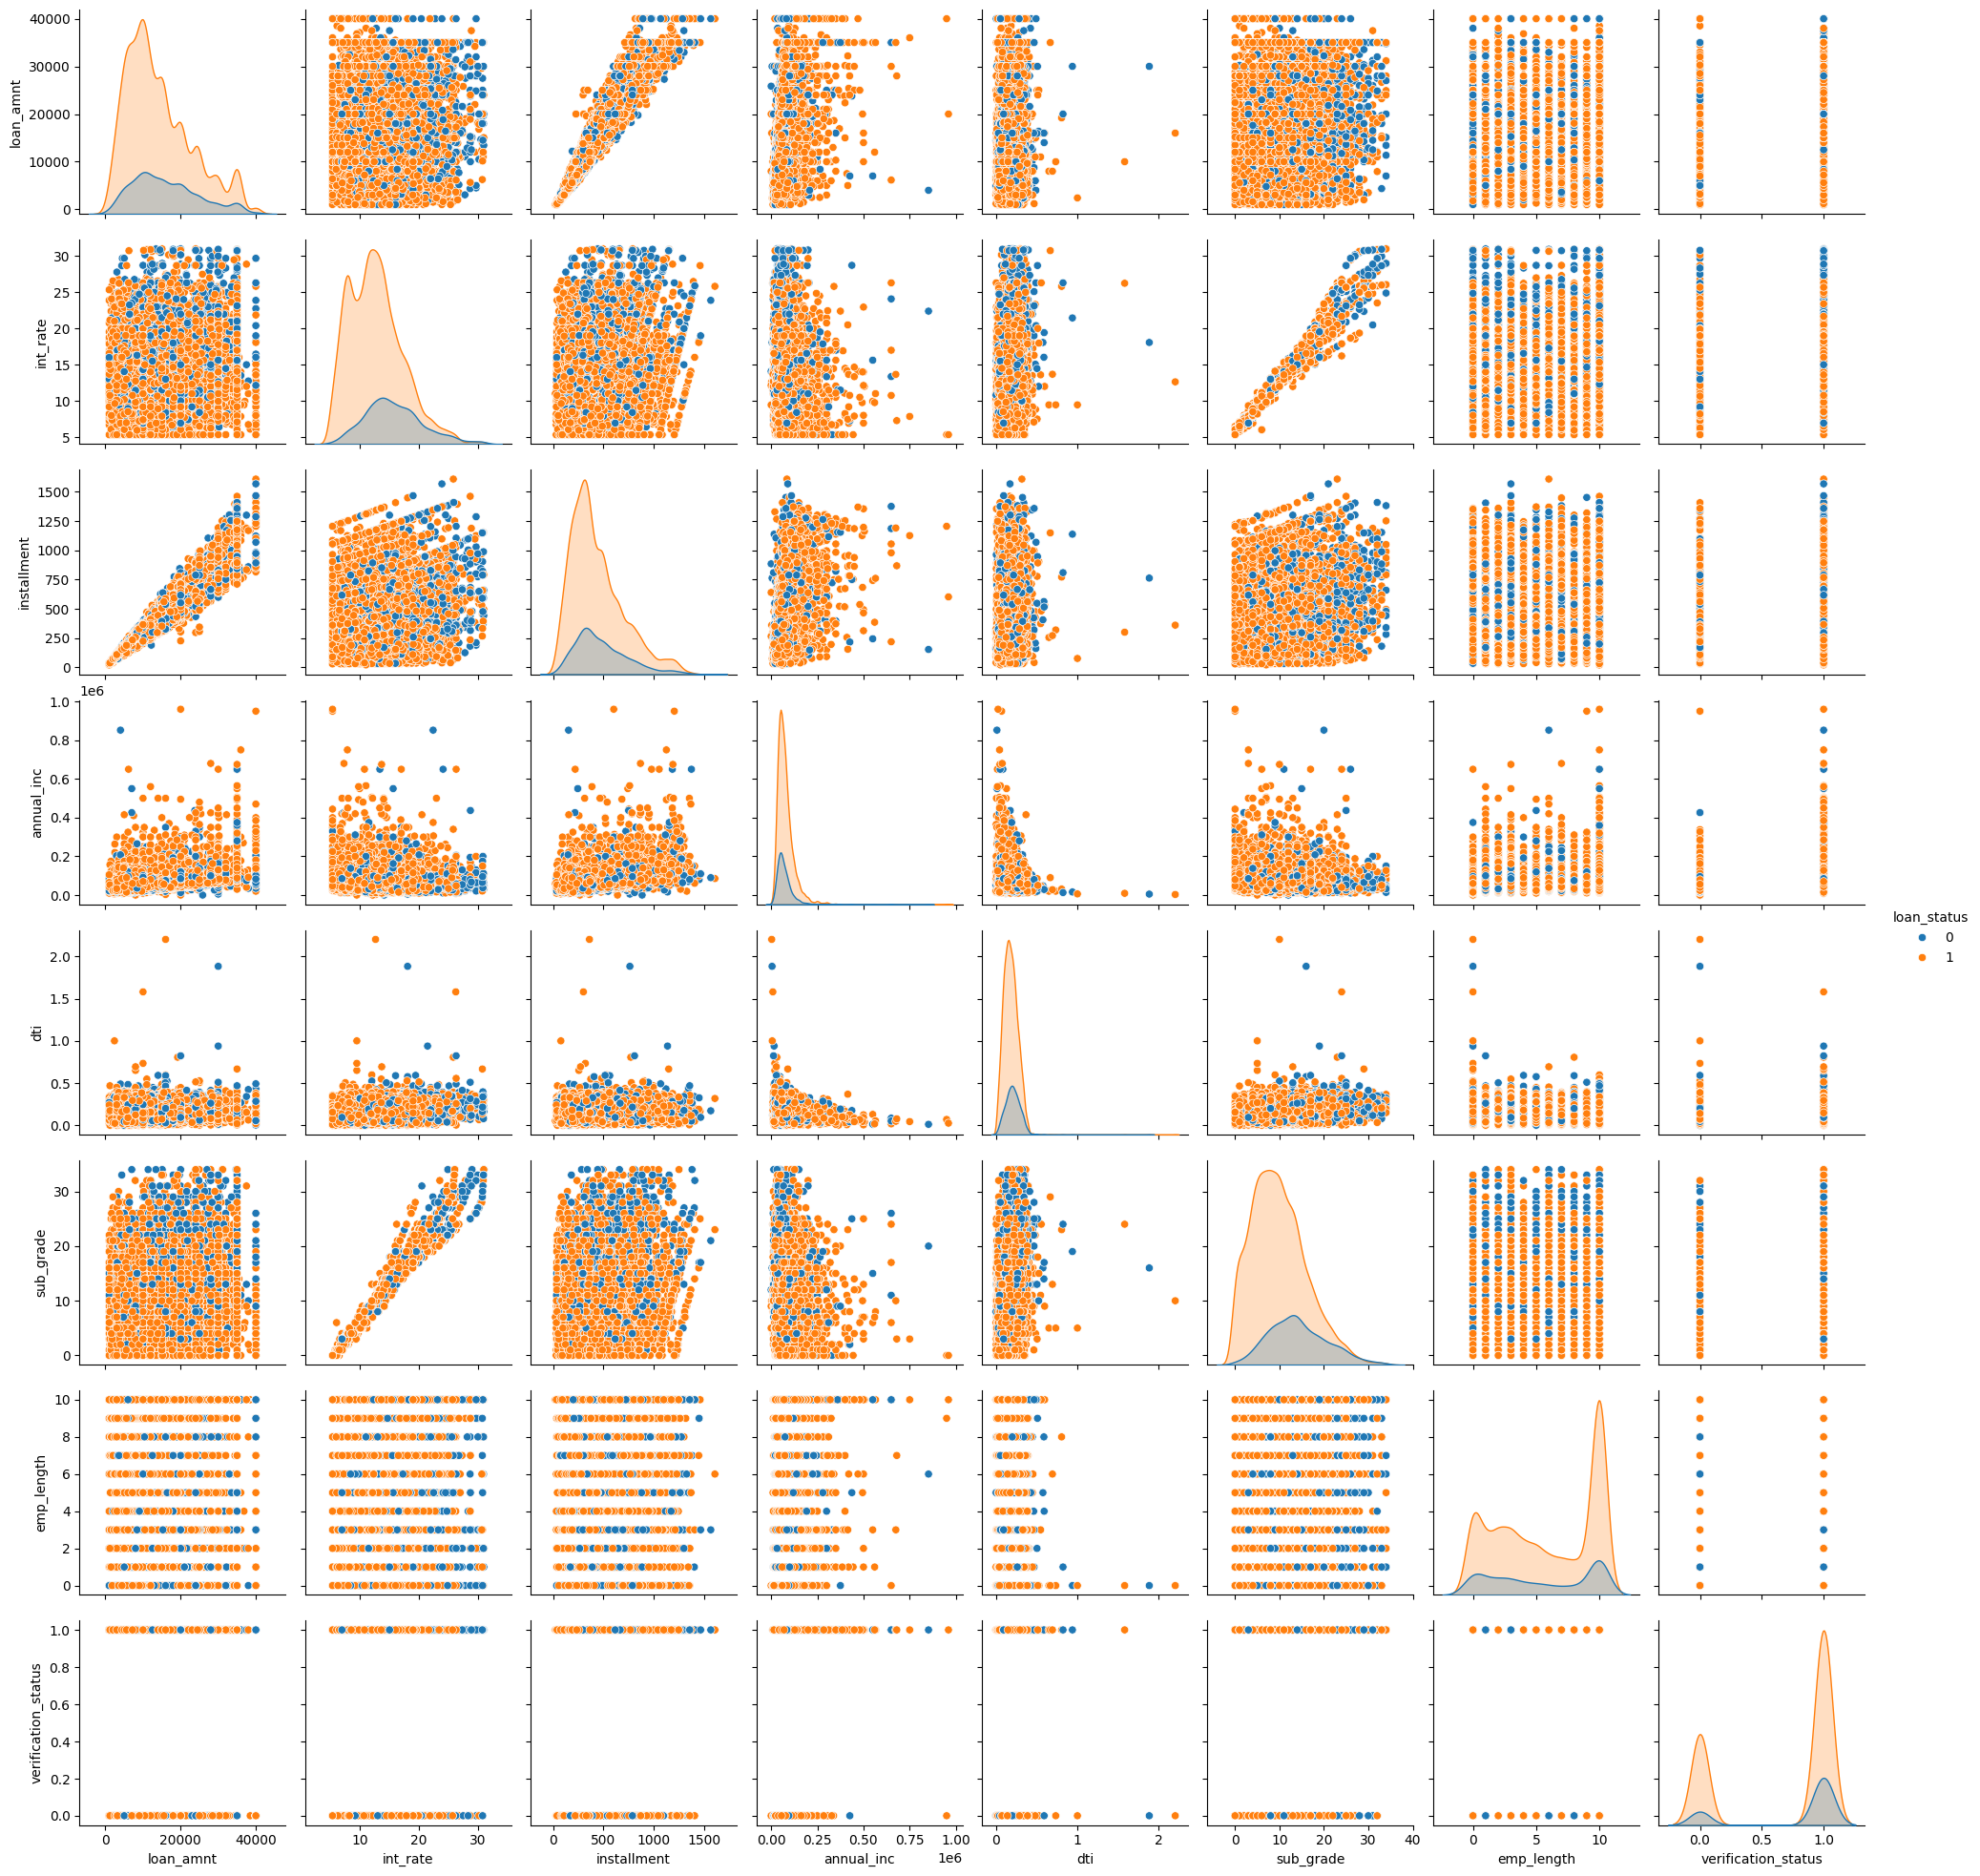

In [544]:
# make a pair plot to get an initial idea
import seaborn as sns

columns = ["loan_status", "loan_amnt", "int_rate", "installment", "annual_inc", "dti", "sub_grade", "emp_length", "verification_status"]

sns.pairplot(data[columns],hue='loan_status')

In [545]:
# set up plotly with preferences
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"  # or "vscode" if using VS Code notebooks

def style_figure(fig):
    fig.update_layout(
        plot_bgcolor="#2B2B2B",   # background inside plot
        paper_bgcolor="#2B2B2B",  # background outside plot
        xaxis=dict(
            color="#A9B7C6",
            gridcolor="#A9B7C6",
        ),
        yaxis=dict(
            color="#A9B7C6",
            gridcolor="#A9B7C6"
        )
    )
    fig.update_xaxes(zerolinecolor="#A9B7C6")
    fig.update_yaxes(zerolinecolor="#A9B7C6")
    return fig

In [639]:
# create a heatmap of interest rate and sub grade, with the colour of each box representing the probability of the loan being repaid
detail = 1.5
data["int_bin"] = pd.cut(data["int_rate"], bins=np.arange(0,data["int_rate"].max()+detail, detail))

# compute repayment probability per (grade, bin)
agg = (data.groupby(["int_bin","sub_grade"], observed=True)["loan_status"]
           .mean()
           .unstack())
agg.index = [interval.mid for interval in agg.index]

# heatmap
fig = px.imshow(
    agg.values,
    x=agg.columns,
    y=agg.index,
    color_continuous_scale=["red","white","blue"],  # red=low repay, blue=high repay
    zmin=0, zmax=1,
    labels=dict(color="frac(Paid)"),
    aspect="auto"
)

fig.update_layout(
    xaxis_title="Risk Grade",
    yaxis_title="Interest Rate (%) bin",
    title="Fraction of Loans Repaid by Risk Grade and Interest Rate",
    yaxis=dict(autorange=True)
)

fig.update_traces(type="heatmap")

fig = style_figure(fig)
fig.show()

In [657]:
# bin interest rates (choose bin size to balance smoothness/detail)
data["x_bin"] = pd.cut(data["installment"], bins=50)
data["y_bin"] = pd.cut(data["loan_amnt"], bins=50)

# Aggregate: here mean loan_status per cell
agg = data.groupby(["y_bin", "x_bin"], observed=True)["loan_status"].mean().unstack()

agg.index = [interval.mid for interval in agg.index]
agg.columns = [interval.mid for interval in agg.columns]
# Index/columns represent the bins

# heatmap
fig = px.imshow(
    agg.values,
    x=agg.columns,
    y=agg.index,
    color_continuous_scale=["red","white","blue"],  # red=low repay, blue=high repay
    zmin=0, zmax=1,
    labels=dict(color="frac(Paid)"),
    aspect="auto"
)

fig.update_layout(
    xaxis_title="Installment",
    yaxis_title="Loan Amount",
    title="Fraction of Loans Repaid by Installment and Loan Amount",
    yaxis=dict(autorange=True)
)

fig.update_traces(type="heatmap")

fig = style_figure(fig)
fig.show()


## **Inisights/Findings and Hypothesis Tests**

### Insights

1. **Higher** risk grade means loans are **more likely to be charged off** (not paid)
2. Loan amounts and installments are **strongly correlated** - this makes sense as higher loan amount will mean higher installment
3. Risk grade and interest rate are **strongly correlated** - this makese sense as higher risk will cause banks to give higher intrest

### Hypotheses
1. Employment length has no effect on the likelihood of a loan being charged off
2. Annual income and risk grade are not correlated

In [678]:
# Hypothesis 1
# H0: employment length has no effect on the probability of a loan being charged off
# H1: employment length has an effect on the probability of a loan being charged off
alpha = 0.05

emp_prob = data.groupby("emp_length")["loan_status"].mean()

fig = px.line(emp_prob)
fig = style_figure(fig)
fig.update_layout(
    xaxis_title="Employment Length",
    yaxis_title="Probability of Loan being Charged Off",
    title="Effect of emplyment length on probability of Loan being Charged Off",
)

fig.show()

from scipy import stats

# Pearson correlation test (linear correlation, assumes normality)
r, p_value = stats.pearsonr(emp_prob.index, emp_prob.values)

print("Correlation coefficient:", r)
print("p-value:", p_value)

if p_value <alpha:
    print(f"Conclusion: since p_value {p_value} is less than alpha {alpha}")
    print("Reject the null hypothesis that employment length has no effect on the probability of a loan being charged off")
    
else:
    print(f"Conclusion: since p_value {p_value} is greater than alpha {alpha}")
    print("Fail to reject the null hypothesis that employment length has no effect on the probability of a loan being charged off")

Correlation coefficient: 0.494762308066212
p-value: 0.121816672052472
Conclusion: since p_value 0.121816672052472 is greater than alpha 0.05
Fail to reject the null hypothesis that employment length has no effect on the probability of a loan being charged off


In [681]:
# Hypothesis 2
# H0: Annual income and risk grade are not correlated
# H1: Anuual income and risk grade are correlated
alpha = 0.05

fig = px.scatter(
    x=data["sub_grade"],
    y=data["annual_inc"]
)
fig = style_figure(fig)
fig.update_layout(
    xaxis_title="Risk Grade",
    yaxis_title="Annual Income",
    title="Effect of emplyment length on probability of Loan being Charged Off",
)
fig.show()

from scipy import stats

# Pearson correlation test (linear correlation, assumes normality)
r, p_value = stats.pearsonr(data["sub_grade"], data["annual_inc"])

print("Correlation coefficient:", r)
print("p-value:", p_value)

if p_value <alpha:
    print(f"Conclusion: since p_value {p_value} is less than alpha {alpha}")
    print("Reject the null hypothesis that annual income and risk grade are not correlated")
    
else:
    print(f"Conclusion: since p_value {p_value} is greater than alpha {alpha}")
    print("Fail to reject the null hypothesis that annual income and risk grade are not correlated")

Correlation coefficient: -0.09156855001527262
p-value: 3.872167037765433e-26
Conclusion: since p_value 3.872167037765433e-26 is less than alpha 0.05
Reject the null hypothesis that annual income and risk grade are not correlated
